# Bike Sharing Dataset Linear Modeling

* Based on Bike Sharing dataset from UCI Machine Learning Repository
* This notebook is based upon the hourly data file, i.e. hour.csv
* This notebook showcases linear modeling using linear regression

## Problem Statement
Given the Bike Sharing dataset with hourly level information of bikes along with weather and other attributes, model a system which can predict the bike count.

# Import required packages


In [85]:
%matplotlib inline
# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

# Load dataset

In [12]:
df = pd.read_csv('../data/hour.csv')
df.shape

(17379, 17)

In [13]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Preprocessing
* Standarize column names
* Typecast attributes
* Encode Categoricals using One Hot Encoding

## Standarize Column Names

In [15]:
# rename columns to make it more understandable and pythonic
df.rename(columns={'instant':'rec_id',
                    'dteday': 'datetime',
                   'holiday': 'is_holiday',
                   'workingday': 'is_workingday',
                   'weathersit': 'weather_condition',
                    'hum': 'humidity',
                   'mnth': 'month',
                   'cnt': 'total_count',
                   'hr': 'hour',
                   'yr': 'year'
}, inplace=True)

In [16]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Typecast Attributes

In [17]:
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [19]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

# Distribution and Trends

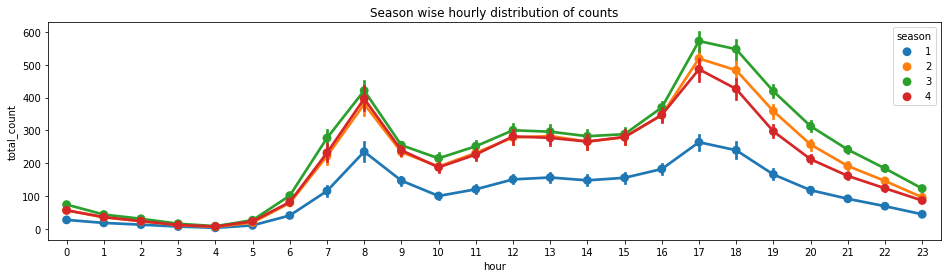

In [53]:
fig, ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=df[['hour','total_count','season']],
              x='hour',
              y='total_count',
              hue='season',ax=ax)
ax.set(title = "Season wise hourly distribution of counts")
plt.show()

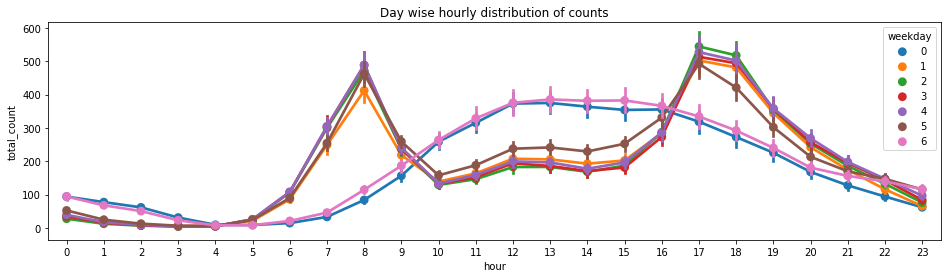

In [54]:
fig, ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=df[['hour','total_count','weekday']],
              x='hour',
              y='total_count',
              hue='weekday',ax=ax)
ax.set(title = "Day wise hourly distribution of counts")
plt.show()

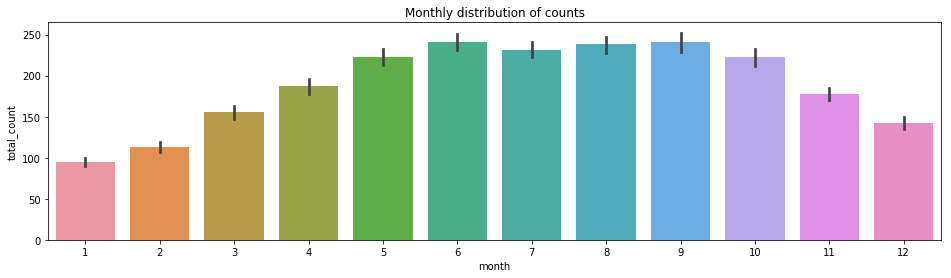

In [52]:
fig,ax = plt.subplots(figsize=(16,4))
sns.barplot(data=df[['month',
'total_count']],
x="month",y="total_count")
ax.set(title="Monthly distribution of counts")
plt.show()

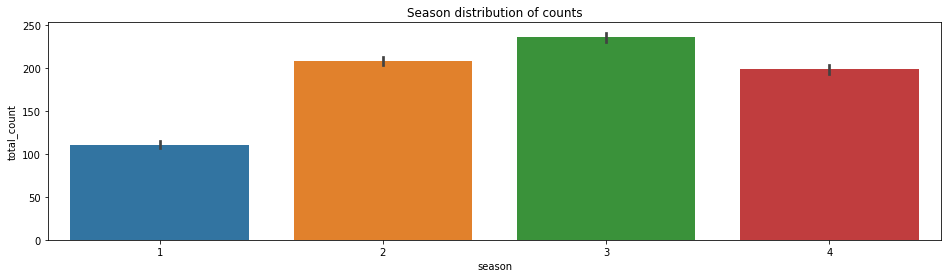

In [55]:
fig,ax = plt.subplots(figsize=(16,4))
sns.barplot(data=df[['season',
'total_count']],
x="season",y="total_count")
ax.set(title="Season distribution of counts")
plt.show()

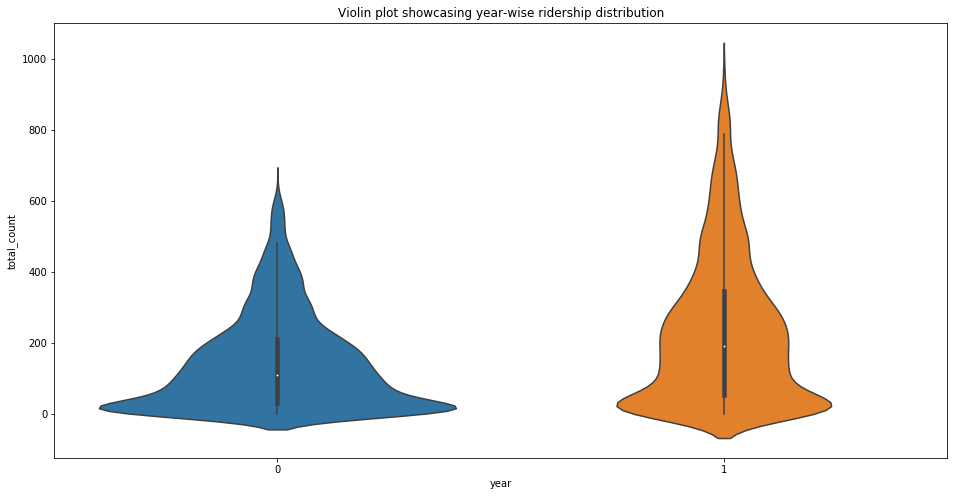

In [61]:
fig,ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=df[['year',
 'total_count']],
 x="year",y="total_count")
ax.set(title='Violin plot showcasing year-wise ridership distribution')
plt.show()

# Outliers

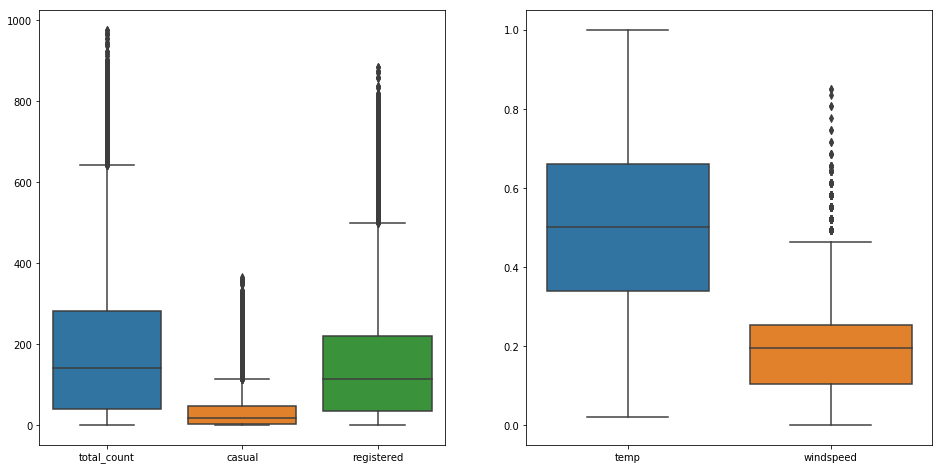

In [65]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(16,8))
sns.boxplot(data=df[['total_count',
'casual','registered']],ax=ax1)
sns.boxplot(data=df[['temp','windspeed']],ax=ax2)
plt.show()

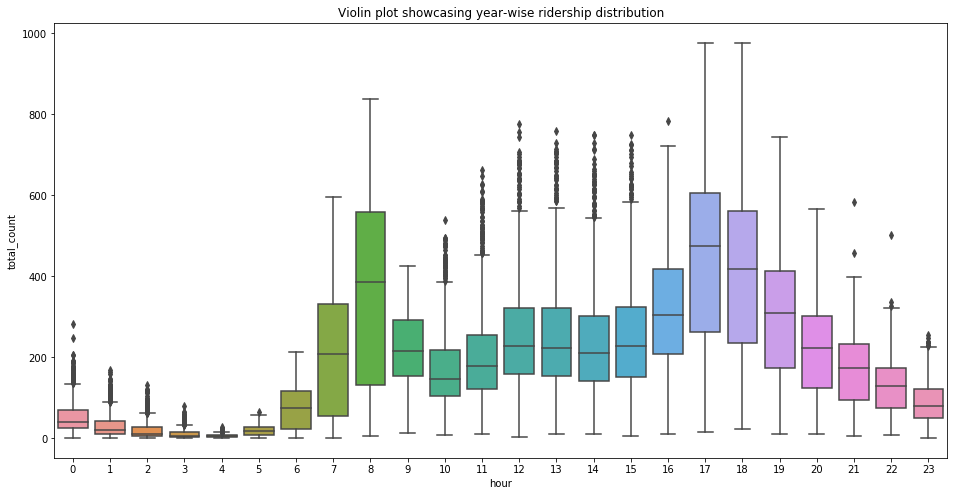

In [68]:
fig,ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df[[
 'total_count','hour']],x='hour',y='total_count')
ax.set(title='Violin plot showcasing year-wise ridership distribution')
plt.show()

# Correlation

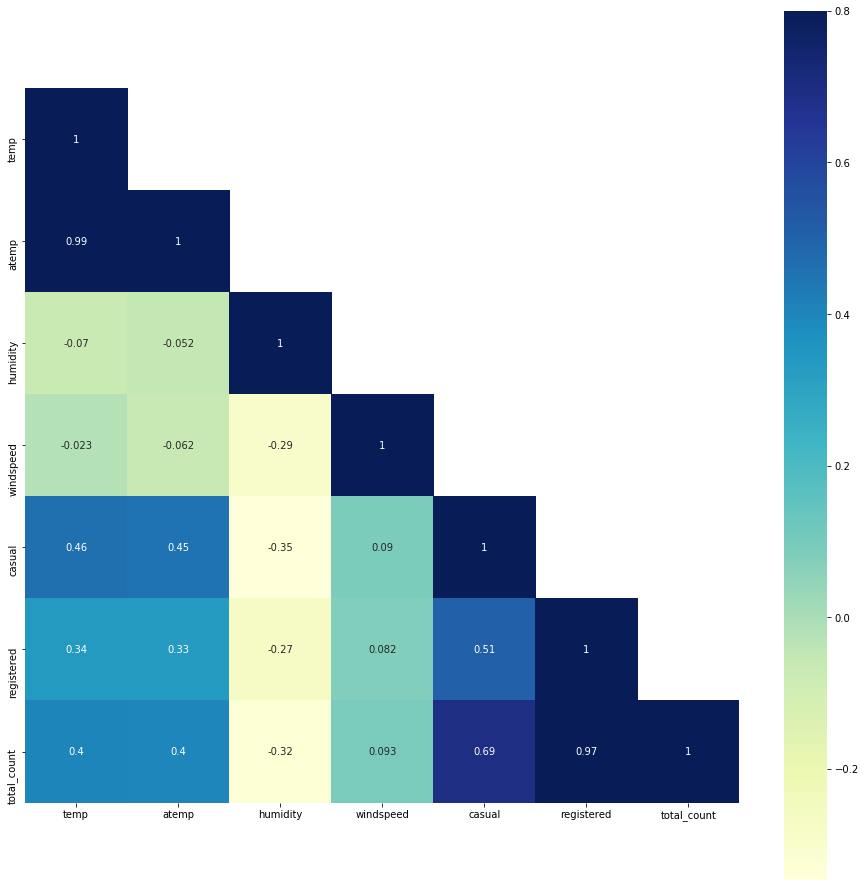

In [74]:
fig,ax = plt.subplots(figsize=(16,16))
corrMatt = df[["temp","atemp",
"humidity","windspeed",
"casual","registered",
"total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
vmax=.8, square=True,annot=True, cmap="YlGnBu")
plt.show()

# Regression Analysis

* The independent variable X
* The dependent or target variable Y
* Unknown parameter(s), dentoed as $\beta$
* The regression function
    * $ Y = f(X,\beta) $
* Commonly used regression technique (Non-parametric)
    * Linear regression
    * Logistic regression
    * Non-linear regression
        * polynomial regression

# Assumption
* The training dataset needs to be representative of the population being modeled
* The independent variable are linearly independent, i.e. one independent variable cannot be explained as a linear combintation of others. In other words, there should be no multicollinearity.
* Homoscedasiticy of error, i.e. the variance of error, is consistent across the sample.


# Evaluation Criteria
## Residual Analysis
$$ e_{i} = y_{i} - f(x_{i}, \beta) $$

## Normality Test (Q-Q Plot)

## R-Squared: Goodness of fit
* R-Squared or the coefficient of determination [0,1]
* 1: able to explain the variance in dependent variable
* 0: poor fitting model

# Modeling

# Encode Categoricals (One Hot Encoding)

In [105]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

## Train-Test Split

In [86]:
X, X_test, y, y_test = train_test_split(df.iloc[:,0:-3],
df.iloc[:,-1],
test_size=0.33,
random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()
X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


## Normality Test

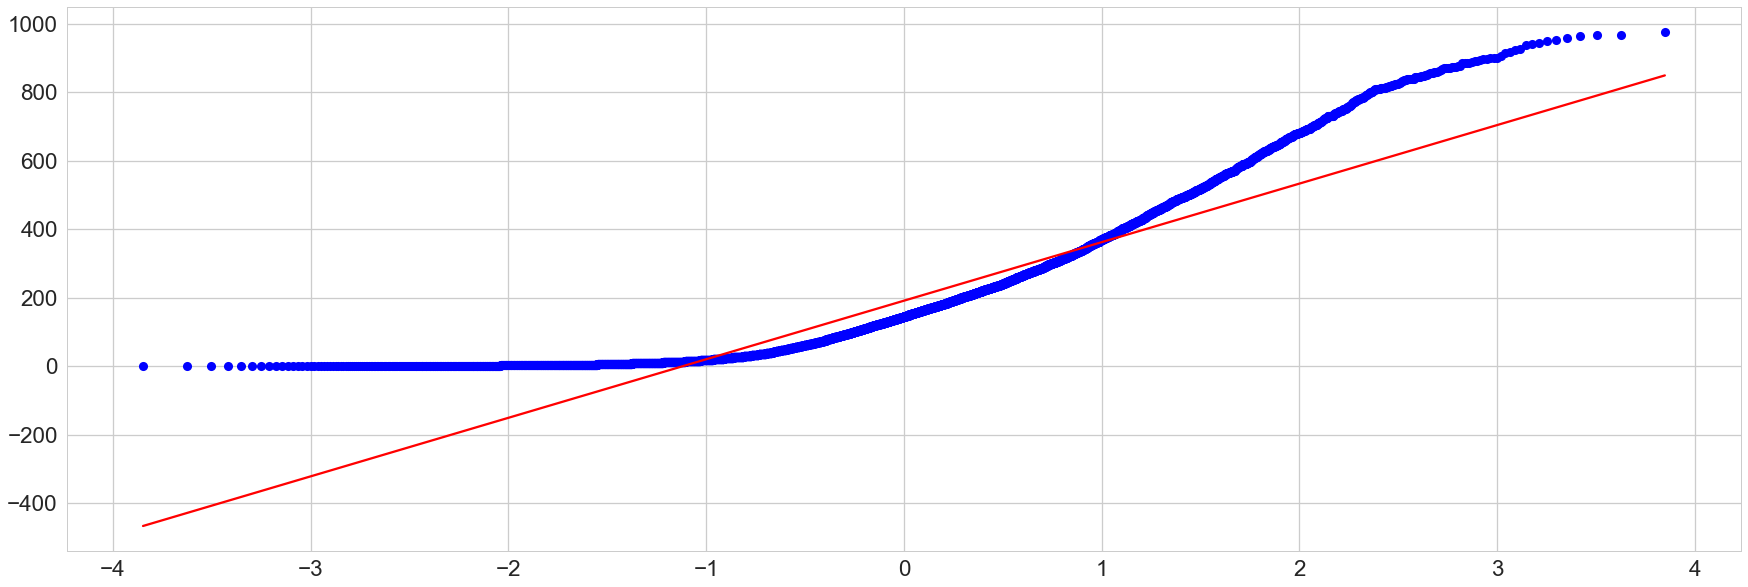

In [87]:
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [88]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [89]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
        'ohe_enc':return_obj[1],
        'feature_df':return_obj[2],
        'col_name':col})

In [90]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
for enc in encoded_attr_list \
if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


## Linear regression
$$ Y = a + bX $$
The Ordinary Least Squares
$$ q = \sum (y_{observed} - y_{predicted})^2 $$
q is the total squared error -> minimize the total error to get the slope and intercept of the best line

In [92]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

In [93]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

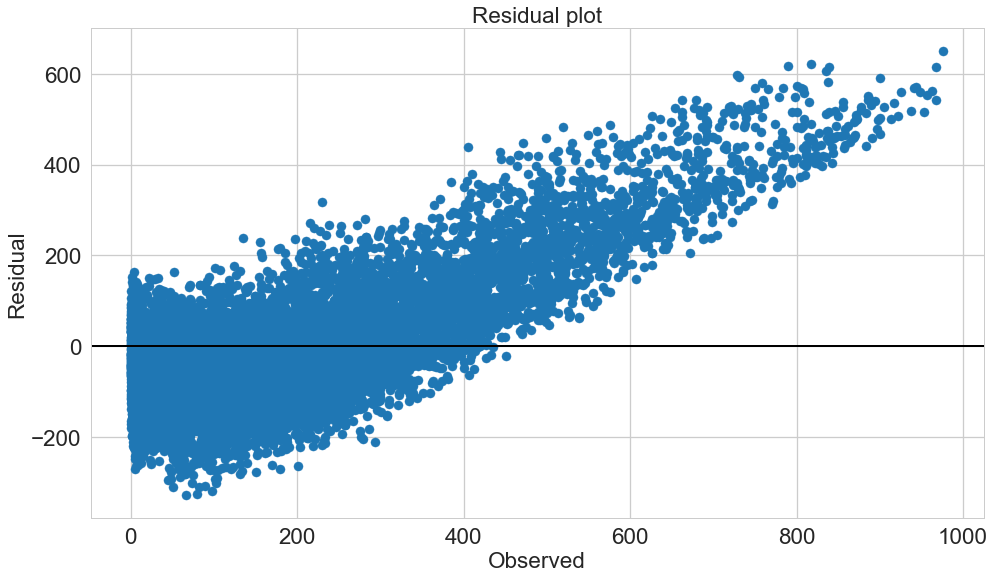

In [96]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

In [97]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

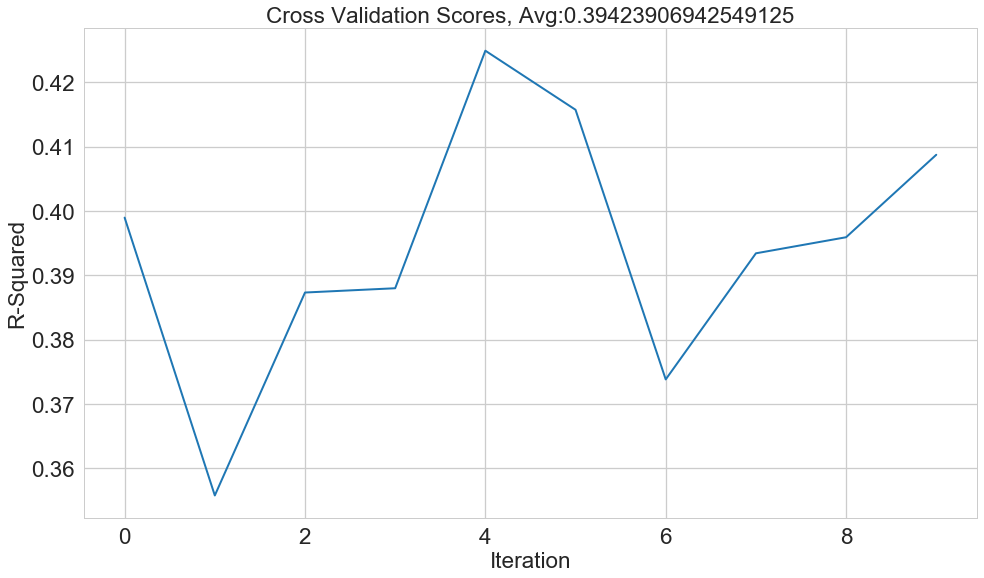

In [99]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [100]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[ 0.39894459  0.35575732  0.3873037   0.38796861  0.42489499  0.41571164
  0.37379762  0.39339864  0.39589746  0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21044.42416385 -18899.05989574]


In [101]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test Dataset Performance

In [106]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [107]:
test_df_new.head()


,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [108]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred

In [109]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.4024409682673428
MSE: 19063.00


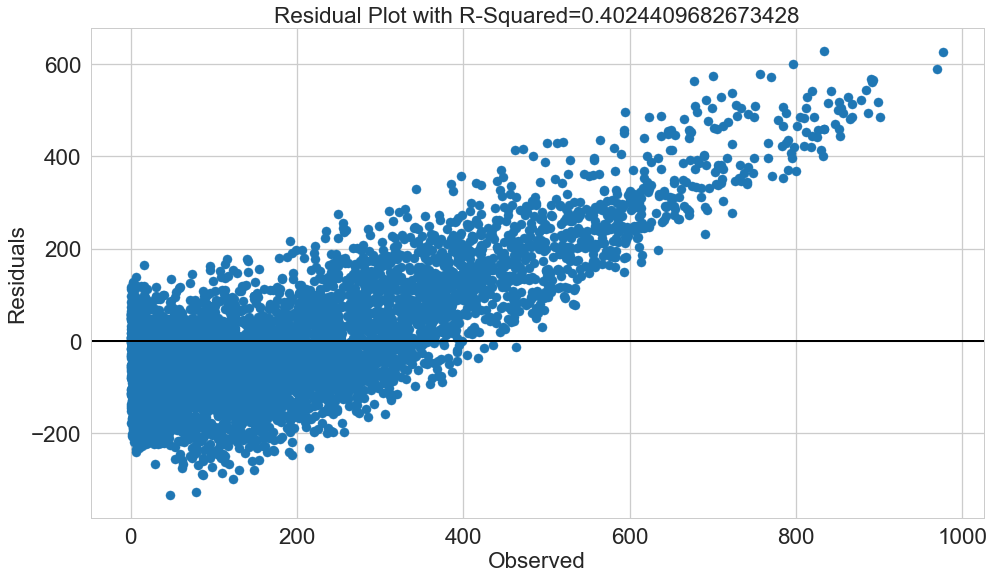

In [111]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

# Stats Models

In [112]:
import statsmodels.api as sm

# Set the independent variable
X = X.values.tolist()

# This handles the intercept. 
# Statsmodel takes 0 intercept by default
X = sm.add_constant(X)

X_test = X_test.values.tolist()
X_test = sm.add_constant(X_test)


# Build OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the predicted values for dependent variable
pred_y = results.predict(X_test)

# View Model stats
print(results.summary())

/Users/wunlung/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     508.2
Date:                Sun, 01 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:40:54   Log-Likelihood:                -74221.
No. Observations:               11643   AIC:                         1.485e+05
Df Residuals:                   11627   BIC:                         1.486e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3509     11.086     -0.122      0.9

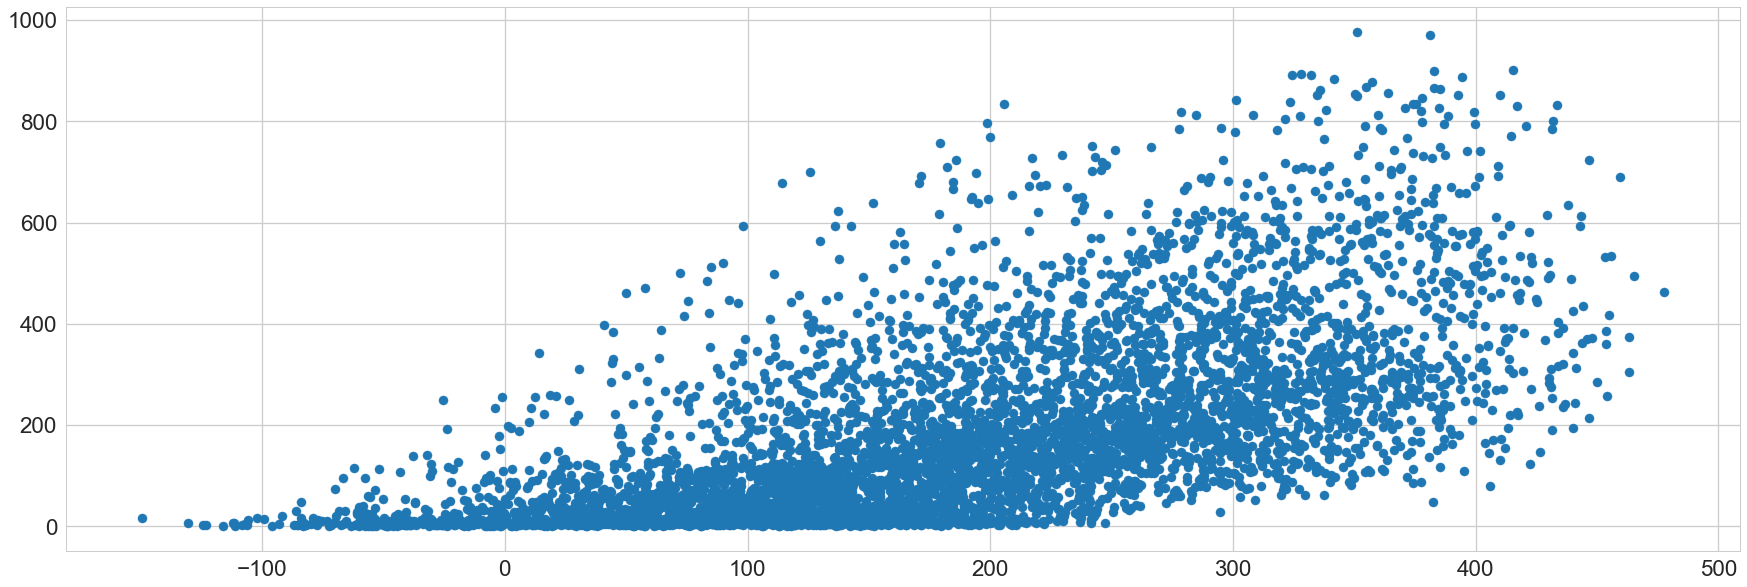

In [113]:
plt.scatter(pred_y,y_test)